# Download Data set from UPenn and Mayo Clinic's Seizure Detection Challenge


https://www.kaggle.com/c/seizure-detection/data

In [1]:
!pip install mne

     |████████████████████████████████| 6.6MB 2.0MB/s 


In [0]:
import mne
import os
import glob
import re
from scipy.io import loadmat
import pandas as pd
import numpy as np


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Add kaggle kaggle.json

In [5]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"catalinabustamante","key":"ce421a6270cf8781b7aca2d4109ed0f3"}'}

In [0]:
!pip install --upgrade --force-reinstall --no-deps kaggle

In [0]:
if '.kaggle' not in os.listdir('/root'):
    !mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [10]:
if not os.path.exists('clips.tar.gz'):
 ! kaggle competitions download -c seizure-detection

100% 10.1G/10.1G [02:40<00:00, 53.2MB/s]
100% 10.1G/10.1G [02:40<00:00, 67.5MB/s]


In [13]:
if not os.path.exists('clips.tar.gz'):
  ! unzip seizure-detection.zip

Archive:  seizure-detection.zip
  inflating: clips.tar.gz            
  inflating: sampleSubmission.csv    
  inflating: sample_clip.mat.gz      


In [0]:
# for each subject
!tar -C /content/drive/My\ Drive/deep_learning/eeg -xvzf clips.tar.gz Volumes/Seagate/seizure_detection/competition_data/clips/Patient_1

In [0]:
!tar -C /content/drive/My\ Drive/deep_learning/eeg -xvzf data/clips.tar.gz Volumes/Seagate/seizure_detection/competition_data/clips/Patient_2

In [0]:
!tar -C /content/drive/My\ Drive/deep_learning/eeg -xvzf data/clips.tar.gz Volumes/Seagate/seizure_detection/competition_data/clips/Patient_3

In [0]:
!tar -C /content/drive/My\ Drive/deep_learning/eeg -xvzf data/clips.tar.gz Volumes/Seagate/seizure_detection/competition_data/clips/Patient_4

In [0]:
!tar -C /content/drive/My\ Drive/deep_learning/eeg -xvzf data/clips.tar.gz Volumes/Seagate/seizure_detection/competition_data/clips/Patient_5

In [0]:
!tar -C /content/drive/My\ Drive/deep_learning/eeg -xvzf data/clips.tar.gz Volumes/Seagate/seizure_detection/competition_data/clips/Patient_6

In [0]:
!tar -C /content/drive/My\ Drive/deep_learning/eeg -xvzf data/clips.tar.gz Volumes/Seagate/seizure_detection/competition_data/clips/Patient_7

In [0]:
!tar -C /content/drive/My\ Drive/deep_learning/eeg -xvzf data/clips.tar.gz Volumes/Seagate/seizure_detection/competition_data/clips/Patient_8

In [0]:
!tar -C /content/drive/My\ Drive/deep_learning/eeg -xvzf data/clips.tar.gz Volumes/Seagate/seizure_detection/competition_data/clips/Dog_1

In [0]:
!tar -C /content/drive/My\ Drive/deep_learning/eeg -xvzf data/clips.tar.gz Volumes/Seagate/seizure_detection/competition_data/clips/Dog_2

In [0]:
!tar -C /content/drive/My\ Drive/deep_learning/eeg -xvzf data/clips.tar.gz Volumes/Seagate/seizure_detection/competition_data/clips/Dog_3

In [0]:
!tar -C /content/drive/My\ Drive/deep_learning/eeg -xvzf data/clips.tar.gz Volumes/Seagate/seizure_detection/competition_data/clips/Dog_4

In [0]:
def mat_to_df(file_path, output = False):
  mat = loadmat(file_path)    # load mat-file

  data = mat['data']          # variable in mat file
  channels = mat['channels']  # dtypes of structures are "unsized objects"
  freq = mat['freq'][0]

  channels_list = []
  for channel_array in channels[0][0]:
    channels_list.append(channel_array[0])

  df = pd.DataFrame(data,
                    index=channels_list)

  df = df.T

  # remove columns that do not change value
  df = df.loc[:, (df != df.iloc[0]).any()]

  if output:
    display(df.head())

  return df, freq


In [0]:
def file_list(folder_path, output=False):
    
    file_list = []
   
    for filename in glob.glob(folder_path):
        file_list.append(filename)
        
    file_list.sort()
    
    if output:
        print(str(len(file_list)) + " files found")
        pp.pprint(file_list)
    
    return file_list

In [0]:
def get_data(subject):

  ictal_list = []
  interictal_list = []


  data_dir = os.path.join(os.getcwd(), 'drive','My Drive','deep_learning','eeg','Volumes', 'Seagate', 
                            'seizure_detection', 'competition_data', 
                            'clips', subject)
  
  all_list = file_list(os.path.join(data_dir, '*'), output=False)

  for file in all_list:
    if re.findall('interictal', file):
      ictal_list.append(file)
    elif re.findall('ictal', file):
      interictal_list.append(file)
  return ictal_list, interictal_list

In [25]:
ictal_list, interictal_list = get_data('Patient_1')
first_ictal_file = ictal_list[1]
first_interictal_file = interictal_list[1]

print('Ictal')
upenn_seizure_df, upenn_seizure_freq = mat_to_df(first_ictal_file, output=True)
print('Interictal')
upenn_baseline_df, upenn_baseline_freq = mat_to_df(first_interictal_file, output=True)

Ictal


,LFG1,LFG10,LFG11,LFG12,LFG13,LFG14,LFG15,LFG16,LFG17,LFG18,LFG19,LFG2,LFG20,LFG21,LFG22,LFG23,LFG24,LFG25,LFG26,LFG27,LFG28,LFG29,LFG3,LFG30,LFG31,LFG32,LFG33,LFG34,LFG35,LFG36,LFG37,LFG38,LFG39,LFG4,LFG40,LFG41,LFG42,LFG43,LFG44,LFG45,LFG46,LFG47,LFG48,LFG49,LFG5,LFG50,LFG51,LFG52,LFG53,LFG54,LFG55,LFG56,LFG57,LFG58,LFG59,LFG6,LFG60,LFG61,LFG62,LFG63,LFG64,LFG7,LFG8,LFG9,LFS1,LFS2,LFS3,LFS4
0,-77.734,-130.642,-1.902,-77.96,98.946,-2.608,-153.31,23.78,-52.344,-372.694,108.68,-160.872,160.99,-13.116,-78.224,164.916,83.594,-318.036,-237.01,172.6,65.378,108.93,41.06,-46.356,135.642,38.464,-337.36,-353.39,-217.92,-30.474,-68.29,-20.106,78.562,34.964,-26.786,-284.776,-232.416,2.47,119.62,-93.724,-75.514,147.088,54.596,-75.362,-55.148,-72.342,-36.564,-5.074,1.788,-95.806,224.49,-88.628,141.908,-5.752,-21.286,3.914,148.4,-17.792,54.694,-13.936,203.64,-43.582,-3.454,31.982,-164.44,-129.328,-178.864,-109.11
1,-74.734,-115.642,18.098,-80.96,73.946,36.392,-130.31,33.78,-50.344,-335.694,114.68,-171.872,160.99,-75.116,-58.224,161.916,88.594,-307.036,-248.01,167.6,52.378,73.93,43.06,-71.356,129.642,45.464,-332.36,-387.39,-248.92,-15.474,-77.29,-26.106,82.562,40.964,-48.786,-294.776,-212.416,22.47,100.62,-163.724,-85.514,120.088,56.596,-59.362,-47.148,-66.342,6.436,0.926,-2.212,-102.806,199.49,-53.628,113.908,-46.752,1.714,8.914,125.4,-33.792,69.694,-13.936,198.64,-13.582,6.546,4.982,-172.44,-117.328,-181.864,-98.11
2,-68.734,-99.642,26.098,-88.96,48.946,36.392,-101.31,54.78,-46.344,-293.694,121.68,-154.872,148.99,-152.116,-46.224,151.916,76.594,-297.036,-254.01,148.6,49.378,37.93,55.06,-72.356,128.642,74.464,-330.36,-409.39,-273.92,-24.474,-113.29,-58.106,37.562,44.964,-74.786,-305.776,-208.416,32.47,74.62,-212.724,-87.514,104.088,52.596,-56.362,-62.148,-72.342,44.436,18.926,7.788,-101.806,181.49,-19.628,103.908,-82.752,10.714,6.914,118.4,-18.792,90.694,-15.936,206.64,9.418,18.546,-15.018,-188.44,-105.328,-174.864,-83.11
3,-72.734,-80.642,30.098,-86.96,52.946,19.392,-58.31,31.78,-41.344,-263.694,129.68,-144.872,141.99,-201.116,-25.224,154.916,32.594,-264.036,-262.01,159.6,53.378,17.93,65.06,-67.356,118.642,100.464,-315.36,-413.39,-299.92,-24.474,-169.29,-92.106,2.562,68.964,-64.786,-307.776,-226.416,7.47,48.62,-282.724,-104.514,83.088,20.596,-41.362,-86.148,-113.342,62.436,29.926,14.788,-111.806,167.49,-15.628,107.908,-123.752,-9.286,-2.086,99.4,-4.792,94.694,-19.936,216.64,25.418,31.546,-16.018,-193.44,-82.328,-160.864,-66.11
4,-90.734,-73.642,29.098,-86.96,43.946,-6.608,-33.31,59.78,-5.344,-247.694,134.68,-121.872,130.99,-235.116,-32.224,154.916,40.594,-238.036,-251.01,190.6,49.378,13.93,66.06,-44.356,134.642,110.464,-290.36,-409.39,-322.92,-9.474,-215.29,-106.106,-17.438,91.964,-23.786,-271.776,-254.416,-17.53,27.62,-329.724,-112.514,75.088,-10.404,-22.362,-82.148,-139.342,54.436,40.926,25.788,-124.806,176.49,-10.628,91.908,-143.752,-44.286,-0.086,87.4,2.208,89.694,-29.936,232.64,57.418,53.546,-41.018,-192.44,-56.328,-151.864,-48.11


Interictal


,LFG1,LFG10,LFG11,LFG12,LFG13,LFG14,LFG15,LFG16,LFG17,LFG18,LFG19,LFG2,LFG20,LFG21,LFG22,LFG23,LFG24,LFG25,LFG26,LFG27,LFG28,LFG29,LFG3,LFG30,LFG31,LFG32,LFG33,LFG34,LFG35,LFG36,LFG37,LFG38,LFG39,LFG4,LFG40,LFG41,LFG42,LFG43,LFG44,LFG45,LFG46,LFG47,LFG48,LFG49,LFG5,LFG50,LFG51,LFG52,LFG53,LFG54,LFG55,LFG56,LFG57,LFG58,LFG59,LFG6,LFG60,LFG61,LFG62,LFG63,LFG64,LFG7,LFG8,LFG9,LFS1,LFS2,LFS3,LFS4
0,198.202,-6.286,46.706,44.214,288.518,105.98,23.62,124.838,115.958,116.758,-4.204,47.88,81.672,601.354,-107.816,419.384,115.242,-25.96,-112.468,330.37,153.956,34.342,126.434,52.318,4.88,-116.214,141.514,-273.692,-232.148,-192.09,-141.932,-75.024,-126.568,362.178,-256.878,-72.874,-97.208,97.7,-95.996,-361.024,-141.846,-288.692,-125.846,-145.218,228.542,-283.642,-88.878,187.688,-75.67,-59.944,-159.73,-137.182,-304.56,-313.614,101.288,159.424,184.294,-25.182,-161.986,-86.146,-117.578,146.996,174.314,109.236,-250.89,-15.716,75.602,89.094
1,172.202,13.714,79.706,70.214,313.518,60.98,-13.38,176.838,81.958,15.758,-91.204,99.88,59.672,679.354,-132.816,408.384,171.242,-93.96,-228.468,240.37,93.956,-23.658,95.434,76.318,54.88,-139.214,122.514,-290.692,-228.148,-347.09,-147.932,-79.024,-69.568,348.178,-116.878,-103.874,-89.208,106.7,-118.996,-331.024,-72.846,-189.692,-149.846,-85.218,224.542,-282.642,-64.878,191.688,-113.67,-29.944,-110.73,-193.182,-297.56,-292.614,70.288,145.424,170.294,-28.182,-76.986,-47.146,-96.578,141.996,262.314,57.236,-232.89,-20.716,88.602,51.094
2,158.202,56.714,109.706,78.214,358.518,28.98,-11.38,251.838,69.958,-72.242,-138.204,143.88,66.672,678.354,-181.816,376.384,165.242,-135.96,-337.468,174.37,55.956,-34.658,76.434,132.318,92.88,-107.214,118.514,-289.692,-233.148,-410.09,-121.932,-58.024,-19.568,358.178,4.122,-130.874,-105.208,122.7,-129.996,-241.024,-19.846,-96.692,-190.846,-36.218,232.542,-282.642,-77.878,204.688,-124.67,-40.944,-83.73,-216.182,-274.56,-271.614,41.288,161.424,162.294,-24.182,-41.986,-19.146,-102.578,140.996,272.314,27.236,-228.89,-30.716,102.602,-18.906
3,178.202,92.714,161.706,111.214,383.518,-12.02,23.62,275.838,82.958,-138.242,-142.204,145.88,86.672,623.354,-207.816,318.384,157.242,-158.96,-384.468,161.37,66.956,-42.658,87.434,197.318,125.88,-51.214,111.514,-284.692,-229.148,-375.09,-86.932,-25.024,55.432,365.178,52.122,-135.874,-111.208,131.7,-119.996,-129.024,-3.846,-35.692,-223.846,24.782,239.542,-251.642,-82.878,243.688,-69.67,-56.944,-61.73,-221.182,-229.56,-251.614,31.288,179.424,157.294,-7.182,-27.986,-5.146,-101.578,131.996,230.314,29.236,-213.89,-19.716,115.602,-67.906
4,197.202,118.714,213.706,173.214,380.518,-29.02,71.62,282.838,91.958,-199.242,-112.204,118.88,130.672,550.354,-185.816,299.384,80.242,-159.96,-371.468,188.37,113.956,-38.658,100.434,289.318,147.88,-14.214,110.514,-254.692,-208.148,-311.09,-11.932,40.976,119.432,349.178,59.122,-134.874,-94.208,133.7,-88.996,-56.024,-2.846,3.308,-219.846,93.782,230.542,-198.642,-15.878,286.688,-21.67,-85.944,-26.73,-239.182,-169.56,-223.614,29.288,202.424,161.294,11.818,-11.986,2.854,-98.578,160.996,166.314,26.236,-193.89,-5.716,100.602,-102.906


In [28]:
mat = loadmat(first_ictal_file)
mat

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: unix, Software: R v3.0.2, Created on: Mon Apr  7 22:12:18 2014',
 '__version__': '1.0',
 'channels': array([[(array(['LFG1'], dtype='<U4'), array(['LFG10'], dtype='<U5'), array(['LFG11'], dtype='<U5'), array(['LFG12'], dtype='<U5'), array(['LFG13'], dtype='<U5'), array(['LFG14'], dtype='<U5'), array(['LFG15'], dtype='<U5'), array(['LFG16'], dtype='<U5'), array(['LFG17'], dtype='<U5'), array(['LFG18'], dtype='<U5'), array(['LFG19'], dtype='<U5'), array(['LFG2'], dtype='<U4'), array(['LFG20'], dtype='<U5'), array(['LFG21'], dtype='<U5'), array(['LFG22'], dtype='<U5'), array(['LFG23'], dtype='<U5'), array(['LFG24'], dtype='<U5'), array(['LFG25'], dtype='<U5'), array(['LFG26'], dtype='<U5'), array(['LFG27'], dtype='<U5'), array(['LFG28'], dtype='<U5'), array(['LFG29'], dtype='<U5'), array(['LFG3'], dtype='<U4'), array(['LFG30'], dtype='<U5'), array(['LFG31'], dtype='<U5'), array(['LFG32'], dtype='<U5'), array(['LFG33'], dt

Interictal


<ipython-input-31-26bcaa5fc5d8>:17: RuntimeWarning: filter_length (1651) is longer than the signal (500), distortion is likely. Reduce filter length or filter a longer signal.
  raw_tmp.filter(1, 60)


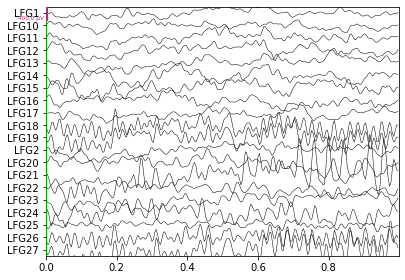


Ictal


<ipython-input-31-26bcaa5fc5d8>:17: RuntimeWarning: filter_length (1651) is longer than the signal (500), distortion is likely. Reduce filter length or filter a longer signal.
  raw_tmp.filter(1, 60)


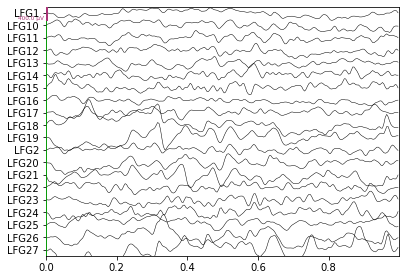

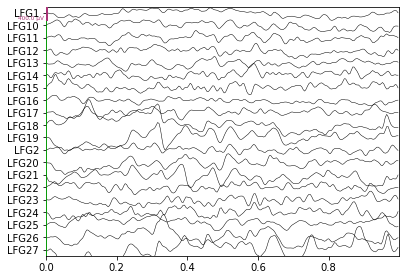

In [31]:
mne.set_log_level('WARNING')

def mne_object(data, freq):

  info = mne.create_info(ch_names=list(data.columns), 
                         sfreq=freq, 
                         ch_types=['eeg']*data.shape[-1])
  
  # data needs to be in volts rather than in microvolts
  data = data.apply(lambda x: x*1e-6)
  # transpose the data
  data_T = data.transpose()
  
  # create raw mne object
  raw = mne.io.RawArray(data_T, info)
  raw_tmp = raw.copy()
  raw_tmp.filter(1, 70)

  return raw, raw_tmp


plot_kwargs = {
    'scalings': dict(eeg=20e-5),   # zooms the plot out
    'highpass': 0.5,              # filters out low frequencies
    'lowpass': 70.,                # filters out high frequencies
    'show_scrollbars': False,
    'show': True
}

print('Interictal')
upenn_baseline_mne, upp_filt= mne_object(upenn_baseline_df, upenn_baseline_freq)
upenn_baseline_mne.plot(**plot_kwargs);
print()
print('Ictal')
upenn_seizure_mne , sei_filt = mne_object(upenn_seizure_df, upenn_seizure_freq)
upenn_seizure_mne.plot(**plot_kwargs)